In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/forwards/ArielInstrumentTier2"
subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

print(subfolders)

len(subfolders)


['TOI-1801bMig', 'K2-26bFidu', 'TOI-1266cMig', 'LTT3780cFidu', 'HD108236dMig', 'TOI-421bMig', 'GJ1214bMig', 'HD108236eFidu', 'TOI-251bFidu', 'TOI-776cFidu', 'G9-40bFidu', 'K2-26bMig', 'HD108236eMig', 'HD63935bFidu', 'TOI-4336AbFidu', 'TOI-122bMig', 'HD63935bMig', 'HD28109dFidu', 'TOI-269bFidu', 'K2-3bMig', 'HD28109dMig', 'HD109833bFidu', 'TOI-700cFidu', 'TOI-1468cMig', 'HD109833bMig', 'HD63433cFidu', 'TOI-4438bFidu', 'TOI-2136bMig', 'HD63433cMig', 'TOI-1136cFidu', 'LP791-18cFidu', 'HD191939bMig', 'TOI-1136eFidu', 'TOI-1136cMig', 'TOI-270dFidu', 'HD191939cMig', 'TOI-1136gFidu', 'TOI-1136eMig', 'GJ1214bFidu', 'HD191939dMig', 'TOI-421bFidu', 'TOI-1136gMig', 'HD191939bFidu', 'TOI-1266bMig', 'Kepler-109cFidu', 'LTT3780cMig', 'HD191939cFidu', 'G9-40bMig', 'HD191939dFidu', 'TOI-4336AbMig', 'TOI-782bFidu', 'HD108236dFidu', 'TOI-269bMig', 'TOI-2120bFidu', 'TOI-700cMig', 'TOI-904bFidu', 'TOI-4438bMig', 'TOI-1470cFidu', 'LP791-18cMig', 'TOI-663cFidu', 'TOI-251bMig', 'TOI-270dMig', 'TOI-270cFidu',

88

In [ ]:
# check failed
from astropy.io import ascii


targetlist = ascii.read("/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/20250322_ArielTargetSimul.csv")

directory_t3 = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/forwards/ArielInstrumentTier3"
subfolders_check = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name)) 
                    and os.path.exists(os.path.join(os.path.join(directory, name), name+".txt"))]


idx = [i for i, name in enumerate(targetlist["Planet Name"]) if name not in subfolders_check]
missing_planets = targetlist[idx]

print(missing_planets["Planet Name"])
print(len(missing_planets))
# ascii.write(missing_planets, "missing_planets.csv", format='csv', overwrite=True)

Planet Name
-----------
0


(1.2, 4.0)

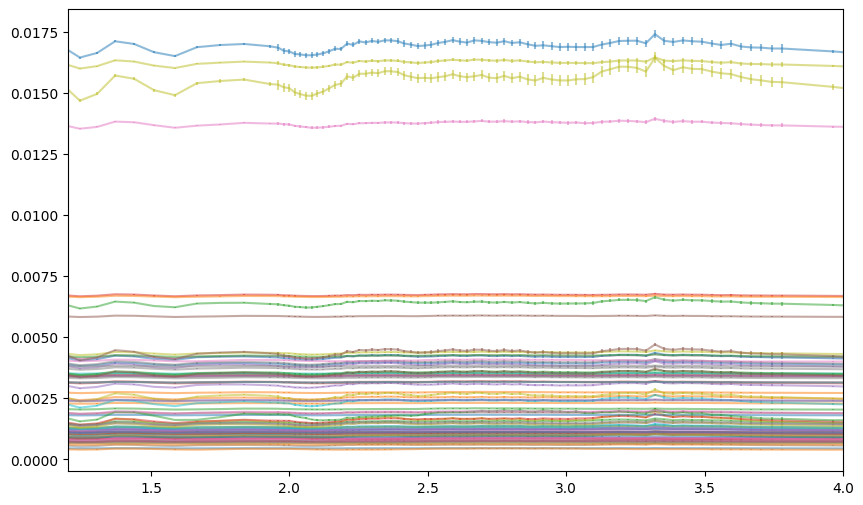

In [4]:
fig = plt.figure(figsize=(10, 6))
for file_ in subfolders:
    data = np.loadtxt('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.txt').T
    plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.5, label=file_)

# plt.legend()
plt.xlim(1.2, 4)

In [5]:
import h5py

nobs = []
for file_ in subfolders:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        # print(f["ModelParameters/Chemistry"].keys())
        nobs.append(f["Output/Spectra/instrument_nobs"][()])

print(nobs)

[1814.0, 330.0, 1000.0, 438.0, 2506.0, 3249.0, 44.0, 119.0, 275.0, 137.0, 223.0, 3663.0, 642.0, 64.0, 46.0, 5863.0, 735.0, 116.0, 818.0, 1340.0, 2164.0, 125.0, 443.0, 1444.0, 3978.0, 75.0, 128.0, 388.0, 1046.0, 47.0, 45.0, 85.0, 68.0, 753.0, 39.0, 506.0, 140.0, 1472.0, 5.0, 106.0, 201.0, 2431.0, 29.0, 356.0, 191.0, 915.0, 41.0, 168.0, 9.0, 1717.0, 181.0, 126.0, 1904.0, 2055.0, 1514.0, 297.0, 458.0, 1562.0, 156.0, 77.0, 1337.0, 493.0, 71.0, 2662.0, 2151.0, 44.0, 638.0, 5327.0, 35.0, 222.0, 3904.0, 4048.0, 311.0, 39.0, 75.0, 592.0, 124.0, 451.0, 236.0, 1815.0, 1788.0, 5828.0, 157.0, 24.0, 1078.0, 35.0, 341.0, 112.0]


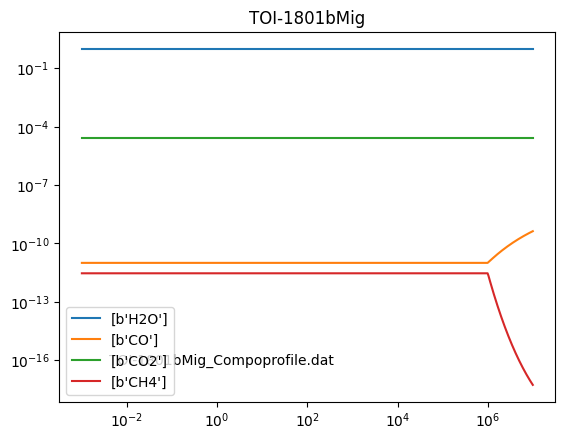

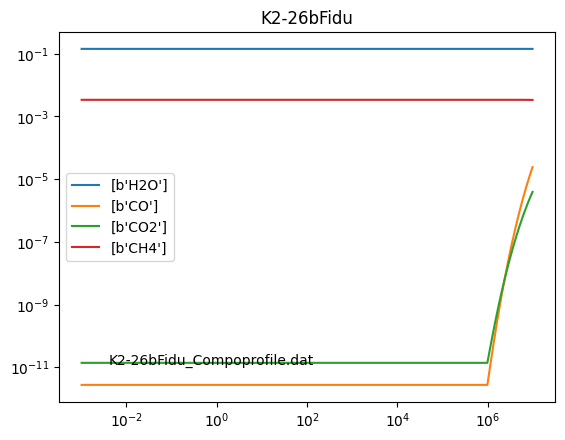

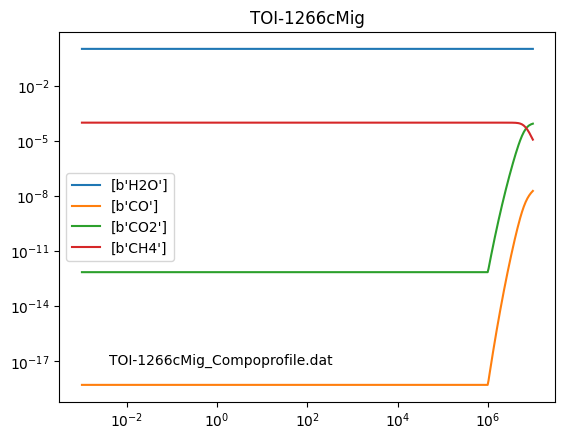

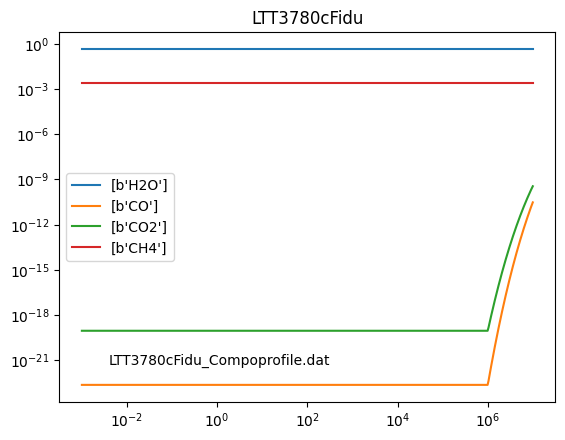

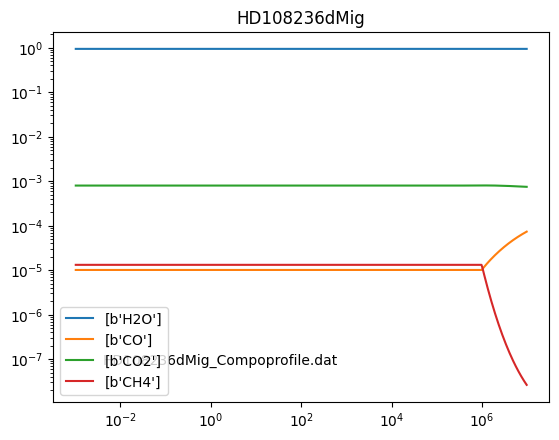

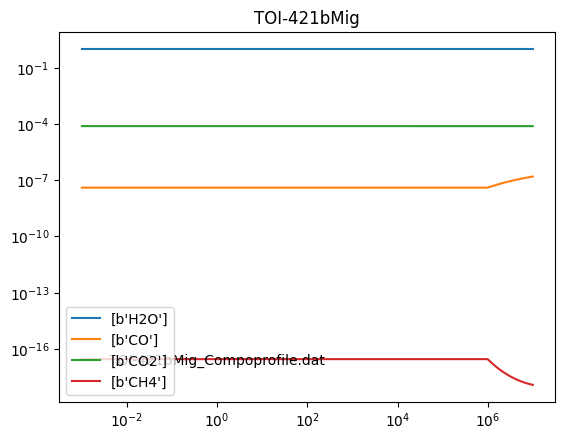

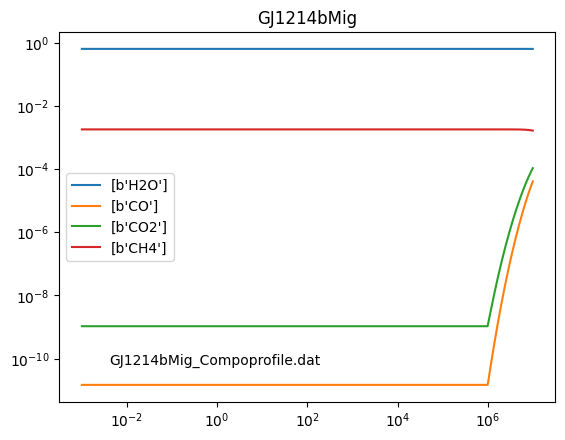

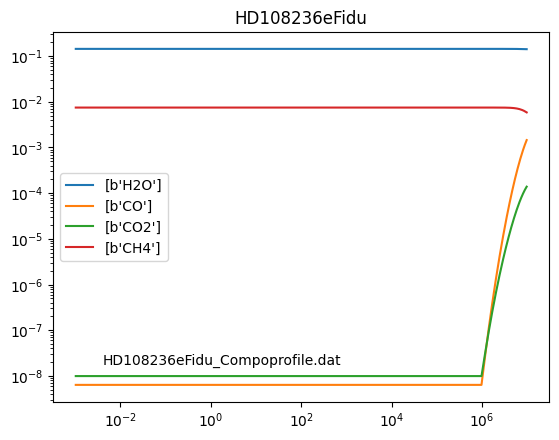

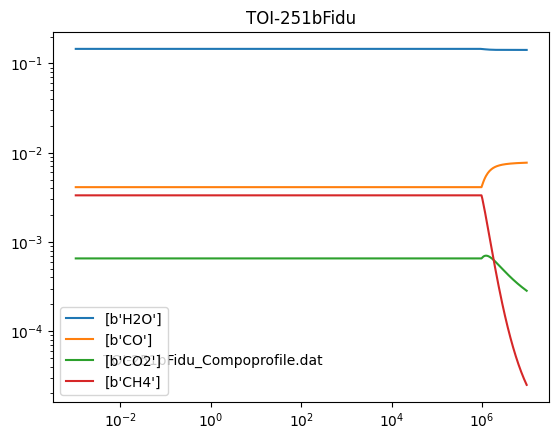

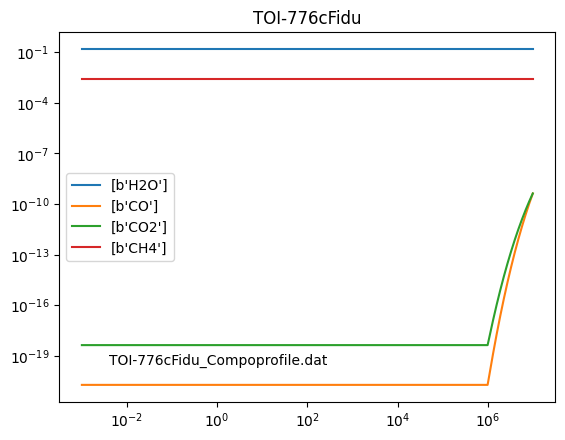

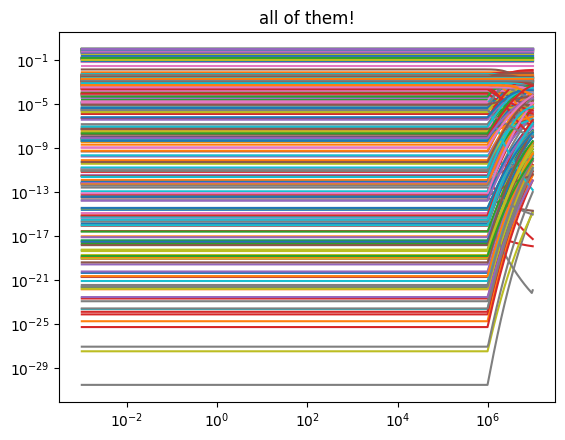

In [6]:
# files = ["Planet99542_Reduced"]
files = subfolders

for file_ in files[:10]:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        plt.title(file_)
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()
        plt.show()
    # nobs.append(f["Output/Spectra/instrument_nobs"][()])
    
    
for file_ in files:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        # plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")

    plt.title("all of them!")

    plt.xscale("log")
    plt.yscale("log")
        # plt.legend()
        # plt.show()